In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

In [5]:
import utils.mnist_reader as mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [16]:
from sklearn.pipeline      import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', LogisticRegression(
                max_iter=500,
                tol=1e-3,
                n_jobs=-1
            ))
])

param_grid = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    # 'clf__penalty': [],  # 'l1' / 'elasticnet'
    'clf__solver': ['saga','lbfgs'],
}

grid = GridSearchCV(pipe, param_grid,
                    cv=3, scoring='accuracy',
                    verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best CV score:", grid.best_score_)
print("Best params:", grid.best_params_)

best = grid.best_estimator_
print("Test accuracy:", best.score(X_test, y_test))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/ashleyjzhou/Desktop/UCi/CS178/cs178-final-project/.conda/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best CV score: 0.8575333333333334
Best params: {'clf__C': 0.1, 'clf__solver': 'saga'}
Test accuracy: 0.8458


In [19]:
best.fit(X_train, y_train)

y_pred = best.predict(X_test)
y_prob = best.predict_proba(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Test accuracy: {acc:.4f}\n")
print(classification_report(y_test, y_pred))

Test accuracy: 0.8458

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.98      0.95      0.97      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.87      0.85      1000
           4       0.74      0.76      0.75      1000
           5       0.94      0.93      0.93      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0.94      0.92      1000
           8       0.93      0.94      0.94      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.84      0.85      0.84     10000
weighted avg       0.84      0.85      0.84     10000



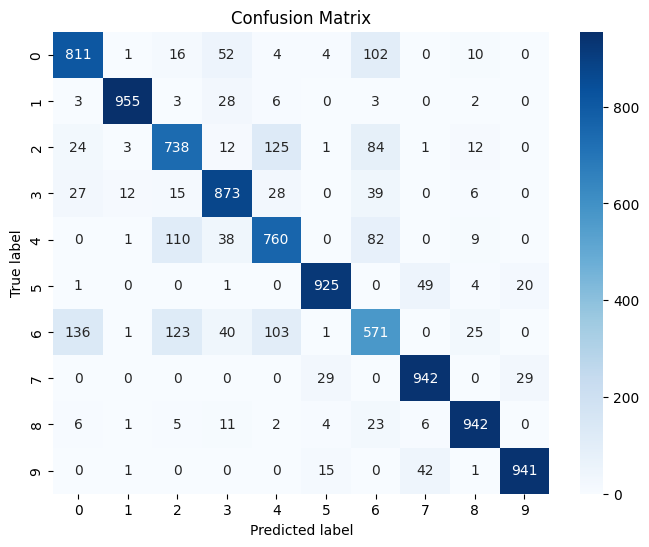

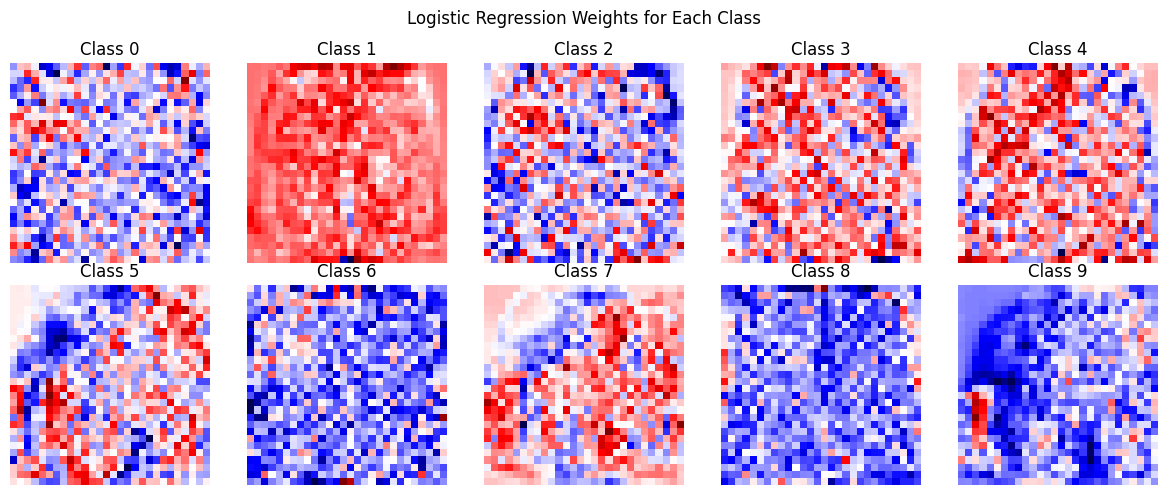

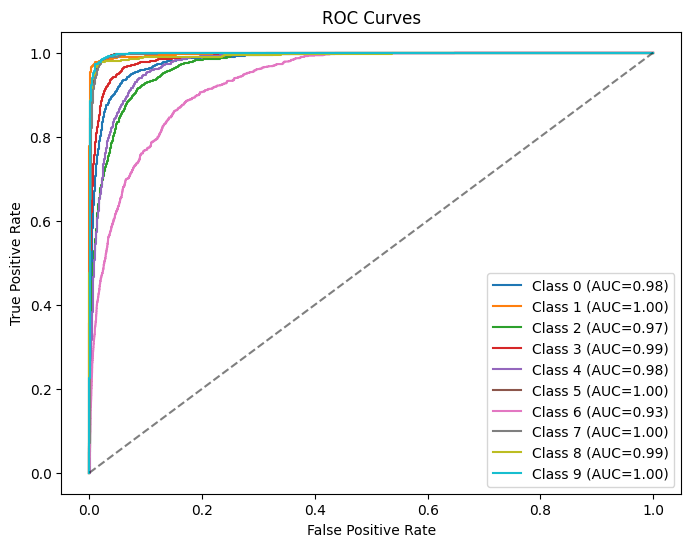

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(clf.coef_[i].reshape(28, 28), cmap='seismic', interpolation='nearest')
    ax.set_title(f"Class {i}")
    ax.axis('off')

plt.suptitle("Logistic Regression Weights for Each Class")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
for class_idx in range(10):
    fpr, tpr, _ = roc_curve(
        (y_test == class_idx).astype(int),
        y_prob[:, class_idx]
    )
    auc = roc_auc_score(
        (y_test == class_idx).astype(int),
        y_prob[:, class_idx]
    )
    plt.plot(fpr, tpr, label=f"Class {class_idx} (AUC={auc:.2f})")

plt.plot([0,1], [0,1], 'k--', alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()